In [0]:
# necessary imports

import requests
import time
import pandas as pd
import numpy as np
import sklearn 
from matplotlib import pyplot
import seaborn

# Task 1: Reading necessary fields

In [0]:
# configuration

headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user', \
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like \
Gecko) Chrome/74.0.3729.108 Safari/537.36', 'X-Requested-With': 'XMLHttpRequest'}

url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

payload = { 'direction': 'next', 'endCursor': '', 'startCursor': '' }


In [0]:
# to take out endCursor

payload = { 'direction': 'next', 'endCursor': '', 'startCursor': '' }
s = requests.Session()
r = s.get(url, headers=headers, params=payload) # GET Call 
data = r.json()

In [0]:
# getting the list of data frames in group of 10 reviews

ls = []
for i in range(300):
  payload = { 'direction': 'next', 'endCursor': data['pageInfo']['endCursor'], 'startCursor': '' }
  s = requests.Session()
  r = s.get(url, headers=headers, params=payload) # GET Call 
  data = r.json()
  a_list = []
  b_list = []
  c_list = []
  d_list = []
  e_list = []
  for i in list(range(10)):
      a = data['reviews'][i]['user']['userId']
      b = data['reviews'][i]['displayName'] 
      c = data['reviews'][i]['review']
      d = data['reviews'][i]['rating']
      e = data['reviews'][i]['createDate']
      a_list.append(a)
      b_list.append(b)
      c_list.append(c)
      d_list.append(d)
      e_list.append(e)
  df = {'ReviewID':a_list, 'Reviewer-Name':b_list, 'Review':c_list, 'Rating':d_list, 'Date-of-Review':e_list}
  df = pd.DataFrame(df)
  ls.append(df)
  time.sleep(6)
  

KeyboardInterrupt: ignored

In [0]:
# concating the generated data frames from step above

df = pd.concat(ls, ignore_index = True)

# checking the shape
print('data frame shape\n{}\n'.format(df.shape))



# checking the head and tail,
print('head of data frame\n{}'.format(df.head()))
print('tail of data frame\n{}'.format(df.tail()))


data frame shape
(200, 5)

head of data frame
                               ReviewID  ...            Date-of-Review
0                             978211573  ...  2019-08-25T03:42:41.074Z
1  51268651-4F59-4EE1-8548-532704C0720A  ...  2019-08-25T03:22:54.090Z
2  763CAB90-6B31-49C4-82C8-6C792099CB0C  ...  2019-08-25T02:36:16.107Z
3                             978094062  ...  2019-08-25T02:20:54.555Z
4  1202B317-3151-4CBE-98E7-6E394402C153  ...  2019-08-25T02:01:17.569Z

[5 rows x 5 columns]
tail of data frame
                                 ReviewID  ...            Date-of-Review
195  8fed057b-99dc-4bce-aadf-15524e5c5f5e  ...  2019-08-22T05:07:52.011Z
196  81c86526-04c4-438d-96f0-e7c33e1d2c73  ...  2019-08-22T05:01:02.623Z
197  0D8F8858-85BB-458A-912D-12AC47CC64C6  ...  2019-08-22T04:31:50.318Z
198  dd0555bc-0744-48f1-934e-b2b7452ee758  ...  2019-08-22T04:29:51.458Z
199  cf3e3f18-cc48-4711-b11d-b602dd963155  ...  2019-08-22T04:21:32.347Z

[5 rows x 5 columns]


Taken csv out and uploaded to google drive and reading from there 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/INSOFE/Text_Mining/phd/filename.csv')

In [123]:
df.head()

,Unnamed: 0,ReviewID,Reviewer-Name,Review,Rating,Date-of-Review
0,0,978203293,Alexander G,Didn't make me feel anything unlike the original.,STAR_3,2019-08-18T04:35:16.243Z
1,1,8ce21b61-d2b1-453e-ab78-fe0ba06088d5,Lori,Well done! A great way to redo a classic. It f...,STAR_5,2019-08-18T04:10:11.153Z
2,2,4e4abb87-64d4-4f65-8673-8e0b9b612c1b,Tim stoeckle,Good movie. Just that the original animated w...,STAR_4,2019-08-18T03:39:22.555Z
3,3,C211508E-B600-44E0-A289-C43EEDF30831,Sheena,I didn’t like Beyoncé being nala. Bad acting. ...,STAR_3,2019-08-18T03:28:50.700Z
4,4,9c220502-046b-4b98-a0d1-ad271ed611f8,Marsha C,Such a beautiful story. We've loved the animat...,STAR_5,2019-08-18T03:25:45.583Z


# Verifying data

In [124]:
# checking duplicate rows, sanity check

print('number of duplicate rows\n{}\n'.format(df.duplicated().sum()))

number of duplicate rows
0



In [125]:
# For sentiment analysis the import things are review and rating 

df2 = df.loc[:, ['Review', 'Rating']]
df2.head()

,Review,Rating
0,Didn't make me feel anything unlike the original.,STAR_3
1,Well done! A great way to redo a classic. It f...,STAR_5
2,Good movie. Just that the original animated w...,STAR_4
3,I didn’t like Beyoncé being nala. Bad acting. ...,STAR_3
4,Such a beautiful story. We've loved the animat...,STAR_5


In [126]:
# checking NAs

print('Number of NAs\n{}\n'.format(df2.isna().sum()))

# dtypes of df2 
print('dtypes of df2\n{}\n'.format(df2.dtypes))
  

Number of NAs
Review    0
Rating    0
dtype: int64

dtypes of df2
Review    object
Rating    object
dtype: object



In [127]:
# checking unique items in Rating to replace with a sentiment values

display(df2.Rating.unique())

array(['STAR_3', 'STAR_5', 'STAR_4', 'STAR_4_5', 'STAR_0_5', 'STAR_2',
       'STAR_2_5', 'STAR_3_5', 'STAR_1_5', 'STAR_1'], dtype=object)

# Task 2: Labelling the review sentiment based on rating

In [0]:
# replacing with sentiment values 0 as positive and 1 as negative, any review 3 and above are taking as positive

sentiment = df2.replace({'Rating': {'STAR_3': 1, 'STAR_5': 0, 'STAR_4': 0, 'STAR_4_5': 0, 'STAR_3_5': 0,\
                        'STAR_0': 1, 'STAR_0_5': 1, 'STAR_1': 1, 'STAR_1_5': 1, 'STAR_2': 1, 'STAR_2_5': 1}})

df2['sentiment'] = sentiment['Rating']

# type conversions

df2 = df2.astype({'Rating': 'category', 'Review': 'str', 'sentiment': 'int'})


In [129]:
# checking above steps output

display(df2.head())

,Review,Rating,sentiment
0,Didn't make me feel anything unlike the original.,STAR_3,1
1,Well done! A great way to redo a classic. It f...,STAR_5,0
2,Good movie. Just that the original animated w...,STAR_4,0
3,I didn’t like Beyoncé being nala. Bad acting. ...,STAR_3,1
4,Such a beautiful story. We've loved the animat...,STAR_5,0


In [0]:
df2.drop(['Rating'], inplace = True, axis = 1)

In [131]:
df2.head()

,Review,sentiment
0,Didn't make me feel anything unlike the original.,1
1,Well done! A great way to redo a classic. It f...,0
2,Good movie. Just that the original animated w...,0
3,I didn’t like Beyoncé being nala. Bad acting. ...,1
4,Such a beautiful story. We've loved the animat...,0


## Preprocessing

In [0]:
# necessary imports for the function preprocessing

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('stopwords')

#stop_words = set(stopwords.words("english")) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# self defined stop words for sentiment analysis
stop_words=['in','of','at','the','this','had','and','were',\
         'for','but','for','wa','who','to','on','it','is','a',\
      'my','we','me','that','didnt', 'WA']

#stop_words = stopwords.words('english')
stop_words=['in','of','at','a','the']
# defining lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Basic preprocessing function
def preprocessing(text):
    text = text.lower() # to lower
    text = re.sub("[.;:!\'?,\"()\[\]]", '', text)
    text = re.sub("(<br\s*/><br\s*/>)|(\-)|(\/)", '', text)
    text = re.sub("[0-9]+", '', text)
    text = re.sub("_", '', text)
    text = word_tokenize(text)
    text = [w for w in text if not w in stop_words] # removing self defined stopwords
    text = [word for word in text if len(word) > 1] # removing single character tokens
    #text = [stemmer.stem(word) for word in text]
    text = [wordnet_lemmatizer.lemmatize(word) for word in text]# doing lemmatizer
    
    return(' '.join(text))
  

In [0]:
df2['filt_sent'] = df2['Review'].apply(preprocessing)

# check how preprocessing function worked

df2.head()

,Review,Rating,sentiment,filt_sent
0,Didn't make me feel anything unlike the original.,STAR_3,1,didnt make me feel anything unlike original
1,Well done! A great way to redo a classic. It f...,STAR_5,0,well done great way to redo classic it felt pa...
2,Good movie. Just that the original animated w...,STAR_4,0,good movie just that original animated wa bett...
3,I didn’t like Beyoncé being nala. Bad acting. ...,STAR_3,1,didn like beyoncé being nala bad acting didn l...
4,Such a beautiful story. We've loved the animat...,STAR_5,0,such beautiful story weve loved animated versi...


In [0]:
# taking selective columns from df2 for further process 

df3 = df2.loc[:, ['filt_sent', 'sentiment']]
display(df3.head())

,filt_sent,sentiment
0,didnt make me feel anything unlike original,1
1,well done great way to redo classic it felt pa...,0
2,good movie just that original animated wa bett...,0
3,didn like beyoncé being nala bad acting didn l...,1
4,such beautiful story weve loved animated versi...,0


In [0]:
# necessary imports

from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# word count 

wc_vectorizer = CountVectorizer(binary = False, ngram_range = (1, 3))
wc_vectorizer.fit(df3['filt_sent'])
X = wc_vectorizer.transform(df3['filt_sent'])

# list of words taken
word_list = wc_vectorizer.get_feature_names() 

# no of times each word in the word_list appeared
count_list = X.toarray().sum(axis=0)

In [0]:
# taking only the words where its total occurence across reviews acrosses a perticular mark

w = np.array(word_list)[np.where(count_list > 30)]

# no of words taken 
print('total words taken in columns\n{}\n'.format(len(w)))

total words taken in columns
469



In [0]:
# createing a data frame with those words, rows are the reviews and columns represent some words present in thet reviews

words_df = pd.DataFrame(X.toarray(), columns = word_list).loc[:, w]

In [0]:
# concatenating words_df with df3 which has reviews and associated sentiment

df4 = pd.concat([df3, words_df], axis = 1)

In [0]:
df5 = df4.drop(['filt_sent'], axis = 1)

In [0]:
# number of positive and negative sentiments 0 for positive and 1 for negative
df5.sentiment.value_counts()

0    2173
1     827
Name: sentiment, dtype: int64

In [0]:
df5['sentiment'] = df5['sentiment'].astype('category')

In [0]:
# a data frame with words (n-gram) that occured in more than 30 reviews, going to use this for unsupervised learning

df5.head()

,sentiment,about,absolutely,acting,acting wa,action,actor,actually,add,added,adult,again,age,all,almost,also,always,amazing,an,and,and it,and pumba,and they,animal,animal looked,animal were,animated,animated movie,animated version,animation,animation wa,another,any,anything,are,away,awesome,back,bad,be,...,wa very,wait,want,wanted,wasnt,watch,watched,watching,way,we,well,well done,went,were,what,when,where,which,while,who,whole,why,will,wish,with,with my,without,wonderful,word,work,worth,would,would have,year,year old,yet,you,you feel,young,your
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Task 3: EDA using Visualization

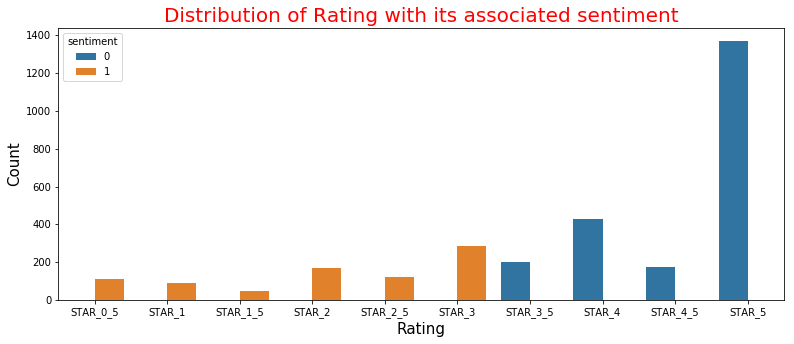

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (13, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.countplot(ax = ax, x = 'Rating', hue = 'sentiment', data = df2.loc[:, ['Rating', 'sentiment']])
plt.title('Distribution of Rating with its associated sentiment', fontsize = 20, color = 'RED')
plt.xlabel('Rating', fontsize = 15, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.show()

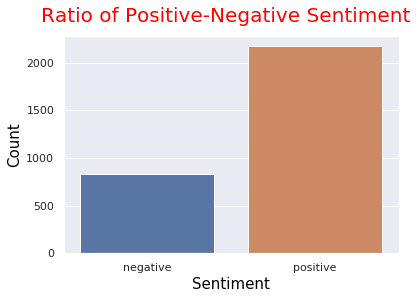

In [0]:
# sentiment of reviews, count of positive and negative
sent = df5.replace({'sentiment': {0: 'positive', 1:'negative'}})
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment", data=sent)
ax.figure.suptitle('Ratio of Positive-Negative Sentiment', fontsize = 20, color = 'RED')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.xlabel('Sentiment', fontsize = 15, color = 'black')
plt.show()

In [0]:
# word count 

negat_senti = df4.loc[df4['sentiment'] == 1, ['filt_sent']]
posit_senti = df4.loc[df4['sentiment'] == 0, ['filt_sent']]

word_in = pd.DataFrame()

word_in['words'] = df4['filt_sent'].apply(lambda x: len(str(x).split()))
word_in_negat_rev = negat_senti['filt_sent'].apply(lambda x: len(str(x).split()))
word_in_posit_rev = posit_senti['filt_sent'].apply(lambda x: len(str(x).split()))

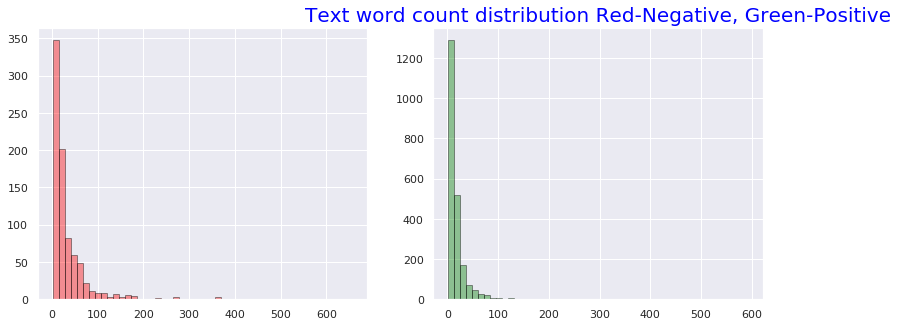

In [0]:
a4_dims = (13, 5)

f, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.distplot(word_in_negat_rev, hist=True, kde=False, 
               color = 'red',
             hist_kws={'edgecolor':'black'}, ax=axes[0], axlabel = False)



sns.distplot(word_in_posit_rev, hist=True, kde=False, 
               color = 'green',
             hist_kws={'edgecolor':'black'}, ax=axes[1], axlabel = False)

plt.title('Text word count distribution Red-Negative, Green-Positive', fontsize=20, color = 'blue')
plt.show()



In [0]:
# necessary imports
import nltk
nltk.download('stopwords')

import warnings
warnings.simplefilter("ignore", UserWarning)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


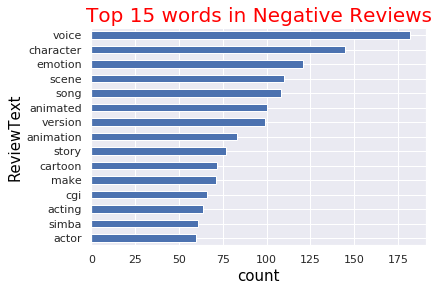

In [0]:

negat_senti = df4.loc[df4[''] == 1, ['filt_sent']]
posit_senti = df4.loc[df4['sentiment'] == 0, ['filt_sent']]

#STOPWORDS = stopwords.words('english')
stopwords = set(STOPWORDS)
stopwords.update(['loved', 'good', 'lion king', 'movie', 'wa', 'good', 'film', 'didnt', 'original', 'amazing',\
                 'great', 'lion', 'king', 'great', 'amazing', 'remake', 'disney', 'animal', 'awesome',\
                 'see', 'really', 'well', 'one', 'done', 'better', 'time', 'much',\
                 'still', 'way', 'thing','feel', 'made', 'shot', 'part', 'new', 'felt',\
                 'even','liked', 'like', 'would'])


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

  
common_words = get_top_n_words(negat_senti['filt_sent'], 15)
uni_posit = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
uni_posit.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot.barh()


plt.xlabel('count', fontsize=15, color = 'black')
plt.ylabel('ReviewText', fontsize=15, color = 'black')
plt.title('Top 15 words in Negative Reviews', fontsize=20, color = 'red')
plt.show()

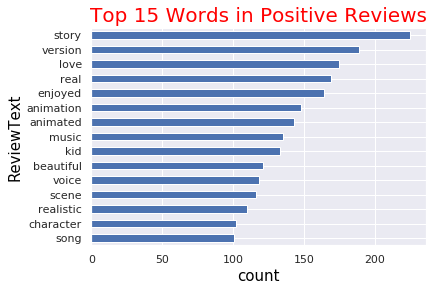

In [0]:
common_words = get_top_n_words(posit_senti['filt_sent'], 15)
uni_posit = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
uni_posit.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot.barh()

plt.xlabel('count')
plt.title('Top 15 Words in Positive Reviews', fontsize=20, color = 'red')
plt.xlabel('count', fontsize=15, color = 'black')
plt.ylabel('ReviewText', fontsize=15, color = 'black')
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


negat_senti = df4.loc[df4['sentiment'] == 1, ['filt_sent']]
posit_senti = df4.loc[df4['sentiment'] == 0, ['filt_sent']]

negat_text = " ".join(review for review in negat_senti.filt_sent)
print ("There are {} words in the combination of all negative review.".format(len(negat_text)))

posit_text = " ".join(review for review in posit_senti.filt_sent)
print ("There are {} words in the combination of all positive review.".format(len(posit_text)))

stopwords = set(STOPWORDS)
stopwords.update(['loved', 'good', 'lion king', 'movie', 'wa', 'good', 'film', 'didnt', 'original', 'amazing',\
                 'great', 'lion', 'king', 'great', 'amazing', 'remake', 'disney', 'animal', 'awesome',\
                 'see', 'really', 'well', 'one', 'done', 'better', 'time', 'much',\
                 'still', 'way', 'thing','feel', 'made', 'shot', 'part', 'new', 'felt',\
                 'even','liked', 'enjoyed'])
# Generate a word cloud image
wordcloud_negat = WordCloud(stopwords=stopwords, background_color="white",\
                           max_font_size=50, max_words=100).generate(negat_text)
wordcloud_posit = WordCloud(stopwords=stopwords, background_color="white",\
                           max_font_size=50, max_words=100).generate(posit_text)


There are 164423 words in the combination of all negative review.
There are 218007 words in the combination of all positive review.


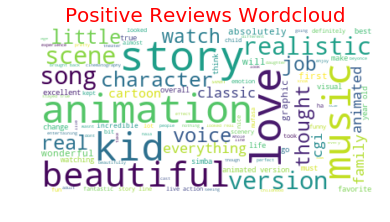

In [0]:
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud_posit, interpolation='bilinear')
plt.title('Positive Reviews Wordcloud', fontsize=20, color = 'red')
plt.axis("off")
plt.show()


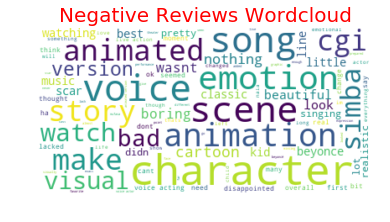

In [0]:
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud_negat, interpolation='bilinear')
plt.title('Negative Reviews Wordcloud', fontsize=20, color = 'red')
plt.axis("off")
plt.show()

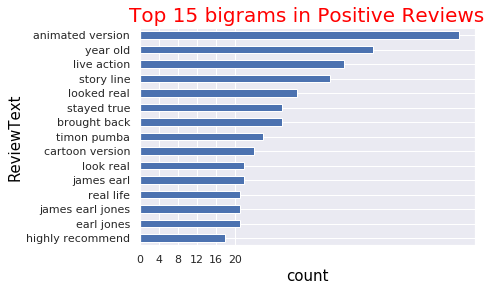

In [0]:
negat_senti = df4.loc[df4['sentiment'] == 1, ['filt_sent']]
posit_senti = df4.loc[df4['sentiment'] == 0, ['filt_sent']]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 3), stop_words= stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
common_words = get_top_n_trigram(posit_senti['filt_sent'], 15)
   
trigram_posit = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
trigram_posit.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot.barh()
plt.title('Top 15 bigrams in Positive Reviews', fontsize=20, color = 'red')
plt.xlabel('count')
plt.xticks(list(range(0,22, 4)))
plt.xlabel('count', fontsize=15, color = 'black')
plt.ylabel('ReviewText', fontsize=15, color = 'black')
plt.show()


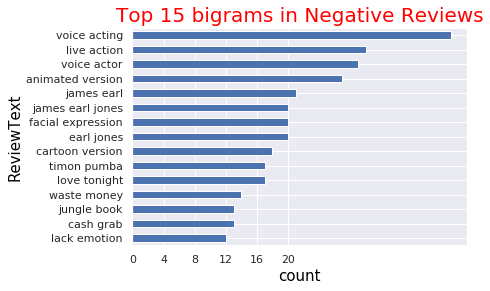

In [0]:
  
common_words = get_top_n_trigram(negat_senti['filt_sent'], 15)
    
trigram_negat = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
trigram_negat.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot.barh(x='ReviewText', y='count')

plt.title('Top 15 bigrams in Negative Reviews', fontsize=20, color = 'red')
plt.xlabel('count')
plt.xticks(list(range(0,22, 4)))
plt.xlabel('count', fontsize=15, color = 'black')
plt.ylabel('ReviewText', fontsize=15, color = 'black')
plt.show()

# Task 4: Sentiment classification using supervised learning algorithems

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [137]:
test_df = pd.read_csv("/content/drive/My Drive/INSOFE/Text_Mining/phd/test-1566381431512.csv")
display(test_df.head())


,ReviewID,Review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [0]:
test_df['Review'] = test_df['Review'].apply(preprocessing)
display(test_df.head())

In [0]:
test_df['filt_sent'] = test_df['Review']

In [0]:
total_df = pd.concat([df3, test_df])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
total_df.head()

,Review,ReviewID,filt_sent,sentiment
0,NaN,NaN,didnt make me feel anything unlike original,1.0
1,NaN,NaN,well done great way to redo classic it felt pa...,0.0
2,NaN,NaN,good movie just that original animated wa bett...,0.0
3,NaN,NaN,didn like beyoncé being nala bad acting didn l...,1.0
4,NaN,NaN,such beautiful story weve loved animated versi...,0.0


In [0]:
cv_total_df = CountVectorizer(binary=False, ngram_range = (1, 3))
cv_total_df.fit(total_df['filt_sent'])
X_total_df = cv_total_df.transform(total_df['filt_sent'])

X_total_df.shape

(4200, 116019)

In [0]:
total_array_df = pd.DataFrame(X_total_df.toarray())
complete_df = total_df.join(total_array_df)

In [0]:
total_test = complete_df.loc[complete_df.ReviewID.notnull()]
total_test.shape

In [0]:
total_train = complete_df.loc[complete_df.sentiment.notnull()]
total_train.shape

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    total_train.iloc[:, 4:46140], total_train.iloc[:,[3]], train_size = 0.75)
#df4.drop(['filt_sent', 'sentiment'], axis = 1)
for c in [0.5, 1, 3, 4, 4.5]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("f1_score for C=%s: %s" 
           % (c, f1_score(y_val, lr.predict(X_val))))

In [0]:
lr = LogisticRegression(C=3)
lr.fit(X_train, y_train)

In [0]:
subm_LR_final = total_test.iloc[:,[1]].join(pd.DataFrame(lr.predict(total_test.iloc[:, 4:46140])))
subm_LR_final.columns = ['ReviewID', 'sentiment']
subm_LR_final.head()

In [0]:
subm_LR_finals = subm_LR_final.set_index('ReviewID')
subm_LR_finals.head()

In [0]:
from google.colab import files
subm_LR_finals.to_csv('subm_LR_finals.csv') 
files.download('subm_LR_finals.csv')

In [0]:
# necessary imports
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4),max_features=5000)
data_features = tfidf_vectorizer.fit_transform(df3['filt_sent'])


In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    data_features, df4.iloc[:,[1]], train_size = 0.75)
#df4.drop(['filt_sent', 'sentiment'], axis = 1)


In [0]:
print("class imbalance, {}".format(y_train['sentiment'].value_counts()[1] / y_train.shape[0]))

class imbalance, 0.2773333333333333


In [0]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("balance class\n {}".format(pd.Series(y_train).value_counts()))

balance class
 1    1626
0    1626
dtype: int64


In [0]:
for c in [0.2, 0.5, 1, 3,4]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("f1_score for C=%s: %s" 
           % (c, f1_score(y_val, lr.predict(X_val))))

f1_score for C=0.2: 0.7352941176470588
f1_score for C=0.5: 0.7366167023554604
f1_score for C=1: 0.7232142857142857
f1_score for C=3: 0.7260273972602739
f1_score for C=4: 0.7260273972602739


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
X_train, y_train = smt.fit_sample(data_features, df4.iloc[:,[1]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("balance class\n {}".format(pd.Series(y_train).value_counts()))

balance class
 1    2173
0    2173
dtype: int64


In [0]:
lr = LogisticRegression(C=3)
lr.fit(X_train, y_train)
data_features_LR = tfidf_vectorizer.fit_transform(test_df['Review'])
lr.predict(data_features_LR)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, ..., 1, 0, 1])

In [0]:
sub_lr = test_df.loc[:, ['ReviewID']].join(pd.DataFrame(lr.predict(data_features_LR)))
sub_lr.columns = ['ReviewID', 'sentiment']
sub_lr = sub_lr.set_index('ReviewID')
sub_lr.head()

,sentiment
ReviewID,
92876,1
92877,0
92878,1
92879,1
92880,0


In [0]:
from google.colab import files
sub_lr.to_csv('sub_lr.csv') 
files.download('sub_lr.csv')

In [0]:

from sklearn.svm import LinearSVC

for c in [1, 2, 3, 3.5, 5]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("f1_score for C=%s: %s" 
           % (c, f1_score(y_val, svm.predict(X_val))))

In [0]:
svm_final = LinearSVC(C=2)
svm_final.fit(data_features, df4.iloc[:,[1]])
data_features_Lsvc = tfidf_vectorizer.fit_transform(test_df['Review'])
svm_final.predict(data_features_Lsvc)

array([1, 0, 0, ..., 0, 0, 0])

In [0]:
sub_svm = test_df.loc[:, ['ReviewID']].join(pd.DataFrame(svm_final.predict(data_features_Lsvc)))
sub_svm.columns = ['ReviewID', 'sentiment']
sub_svm = sub_svm.set_index('ReviewID')
sub_svm.head()

NameError: ignored

In [0]:
from google.colab import files
sub_svm.to_csv('sub_svm.csv') 
files.download('sub_svm.csv')

In [0]:
from sklearn.naive_bayes import BernoulliNB

#Create a Gaussian Classifier
model = BernoulliNB(0.01)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
print ("f1 score: %s" 
       % f1_score(y_val, model.predict(X_val)))

f1 score: 0.6335078534031414


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=4000)
data_features = tfidf_vectorizer.fit_transform(df3['filt_sent'])


In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    data_features, df4.iloc[:,[1]], train_size = 0.85)
#df4.drop(['filt_sent', 'sentiment'], axis = 1)

In [0]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50, 100],
           "max_depth" : [ 5, 7 ],
           "learning_rate" : [0.5, 0.9]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 7)

In [0]:
%time CV_GBM.fit(X=X_train, y=y_train)

CPU times: user 30.4 s, sys: 57.6 ms, total: 30.4 s
Wall time: 30.5 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [0]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

In [0]:
y_pred_test=best_gbm_model.predict(X_val)


In [0]:
print(f1_score(y_val,y_pred_test))

0.676923076923077


In [0]:
data_features_boost = tfidf_vectorizer.fit_transform(test_df['Review'])

In [0]:
y_pred_test_final = best_gbm_model.predict(data_features_boost)

In [0]:
y_pred_test_final

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
sub_boost = test_df.loc[:, ['ReviewID']].join(pd.DataFrame(y_pred_test_final))
sub_boost.columns = ['ReviewID', 'sentiment']
sub_boost = sub_boost.set_index('ReviewID')
sub_boost.head()

In [0]:
from google.colab import files
sub_boost.to_csv('sub_boost.csv') 
files.download('sub_boost.csv')

In [0]:
reviews_train = df2
reviews_test = test_df

In [151]:
reviews_train.head()

,Review,sentiment
0,Didn't make me feel anything unlike the original.,1
1,Well done! A great way to redo a classic. It f...,0
2,Good movie. Just that the original animated w...,0
3,I didn’t like Beyoncé being nala. Bad acting. ...,1
4,Such a beautiful story. We've loved the animat...,0


In [152]:
reviews_test.head()

,ReviewID,Review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [0]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train['Review'])
reviews_test_clean = preprocess_reviews(reviews_test['Review'])

In [0]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

In [263]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1, 1.5]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.756
Accuracy for C=0.05: 0.7826666666666666
Accuracy for C=0.25: 0.796
Accuracy for C=0.5: 0.796
Accuracy for C=1: 0.7946666666666666
Accuracy for C=1.5: 0.7906666666666666


In [0]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(reviews_train_clean)

In [0]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews = get_stemmed_text(reviews_train_clean)

In [0]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews = get_lemmatized_text(reviews_train_clean)

In [318]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1, 1.5, 2]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.76
Accuracy for C=0.05: 0.7986666666666666
Accuracy for C=0.25: 0.82
Accuracy for C=0.5: 0.8213333333333334
Accuracy for C=1: 0.8293333333333334
Accuracy for C=1.5: 0.8266666666666667
Accuracy for C=2: 0.824


In [251]:
final_ngram = LogisticRegression(C=1.5)
final_ngram.fit(X, reviews_train['sentiment'])
final_ngram.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 1])

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(reviews_train_clean)
X = wc_vectorizer.transform(reviews_train_clean)
X_test = wc_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75, 
)

for c in [0.01, 0.05, 0.25, 0.5, 1, 1.5, 2]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))


Accuracy for C=0.01: 0.7413333333333333
Accuracy for C=0.05: 0.7733333333333333
Accuracy for C=0.25: 0.776
Accuracy for C=0.5: 0.7826666666666666
Accuracy for C=1: 0.7866666666666666
Accuracy for C=1.5: 0.7893333333333333
Accuracy for C=2: 0.7853333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [267]:
final_wc = LogisticRegression(C=1)
final_wc.fit(X, reviews_train['sentiment'])
result_wc = final_wc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [271]:
sub_wc = test_df.loc[:, ['ReviewID']].join(pd.DataFrame(result_wc))
sub_wc.columns = ['ReviewID', 'sentiment']
sub_wc = sub_wc.set_index('ReviewID')
sub_wc.head()

,sentiment
ReviewID,
92876,0
92877,0
92878,0
92879,0
92880,0


In [0]:
from google.colab import files
sub_wc.to_csv('sub_wc.csv') 
files.download('sub_wc.csv')

In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75
)

for c in [0.5, 1, 1.5, 2, 2.5, 2.7, 3]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))


Accuracy for C=0.5: 0.7813333333333333
Accuracy for C=1: 0.8026666666666666
Accuracy for C=1.5: 0.812
Accuracy for C=2: 0.812
Accuracy for C=2.5: 0.8186666666666667
Accuracy for C=2.7: 0.8173333333333334
Accuracy for C=3: 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [349]:
final_tfidf = LogisticRegression(C=2.5)
final_tfidf.fit(X, reviews_train['sentiment'])
result_tf = final_tfidf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [350]:
sub_tf = test_df.loc[:, ['ReviewID']].join(pd.DataFrame(result_tf))
sub_tf.columns = ['ReviewID', 'sentiment']
sub_tf = sub_tf.set_index('ReviewID')
sub_tf.head()

,sentiment
ReviewID,
92876,0
92877,0
92878,0
92879,0
92880,0


In [0]:
from google.colab import files
sub_tf.to_csv('sub_tf.csv') 
files.download('sub_tf.csv')

In [351]:
sub_tf['sentiment'].value_counts()

0    974
1    226
Name: sentiment, dtype: int64

In [287]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1, 1.4]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))


Accuracy for C=0.01: 0.8306666666666667
Accuracy for C=0.05: 0.8346666666666667
Accuracy for C=0.25: 0.8413333333333334
Accuracy for C=0.5: 0.8333333333333334
Accuracy for C=1: 0.8293333333333334
Accuracy for C=1.4: 0.828


final_svm_ngram = LinearSVC(C=0.01)
final_svm_ngram.fit(X, reviews_train['sentiment'])
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_svm_ngram.predict(X_test)))

In [281]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, reviews_train['sentiment'], train_size = 0.75
)

for c in [0.001, 0.005, 0.01, 0.05, 0.1, 1.5, 2]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))
    
    



Accuracy for C=0.001: 0.7586666666666667
Accuracy for C=0.005: 0.8146666666666667
Accuracy for C=0.01: 0.828
Accuracy for C=0.05: 0.832
Accuracy for C=0.1: 0.8253333333333334
Accuracy for C=1.5: 0.812
Accuracy for C=2: 0.812


In [204]:
final = LinearSVC(C=0.1)
final.fit(X, reviews_train['sentiment'])
final.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])